<details>
    <summary>Metadata</summary>
    title: "E-TRAINEE: Tutorial: Spectra smoothening and denoising"<br>
    description: "This is a tutorial within the second theme of the Airborne Imaging Spectroscopy Time Series Analysis module."<br>
    dateCreated: 2023-10-16 <br>
    authors: Alex Srolleru <br>
    contributors: Marketa Potuckova <br>
    estimatedTime: <br>
</details>

# Tutorial: Spectra smoothening and denoising 

In this tutorial, two filtering methods are discussed: Savitzky-Golay filter, Simple Moving Average filter, and their parameters are explained in detail. They are applied on spectra containing 270 bands with wavelengths ranging from 400 to 1,000 nm. The spectra were acquired with a Nano-Hyperspec® camera mounted on the DJI Matrice 600 Pro drone (see the [dataset description](../../data_usecases/usecase_grasses_krkonose.html)). The filters are implemented in Python, and the tutorial can be downloaded as a Jupyter Notebook.

First, we are going to import the needed libraries. SciPy is an open-source Python library used for scientific computing, and matplotlib serves for plotting and visualization in general.

In [5]:
import scipy as sp
import matplotlib.pyplot as mp

The provided data consists of reflectance values extracted for different Bílá louka meadow grass species (nard, mol, desch, and cv) from hyperspectral imagery and wavelengths [nm] at which the reflectance values were acquired.  

In [7]:
wavelength=[398.784,  401.026,  403.268,  405.51,  407.751,  409.993, 412.235,  414.477,  416.719, 418.961,  421.202,  423.444, 425.686,  427.928,  430.17 ,  432.411,  434.653,  436.895, 439.137,  441.379,  443.621,  445.862,  448.104,  450.346, 452.588,  454.83 ,  457.072,  459.313,  461.555,  463.797, 466.039,  468.281,  470.523,  472.764,  475.006,  477.248, 479.49,  481.732,  483.974,  486.215,  488.457,  490.699, 492.941,  495.183,  497.425,  499.666,  501.908,  504.15, 506.392,  508.634,  510.876,  513.117,  515.359,  517.601, 519.843,  522.085,  524.327,  526.568,  528.81 ,  531.052, 533.294,  535.536,  537.778,  540.019,  542.261,  544.503, 546.745,  548.987,  551.229,  553.47 ,  555.712,  557.954, 560.196,  562.438,  564.68,  566.921,  569.163,  571.405, 573.647,  575.889,  578.131,  580.372,  582.614,  584.856, 587.098,  589.34 ,  591.582,  593.823,  596.065,  598.307, 600.549,  602.791,  605.032,  607.274,  609.516,  611.758, 614.000,  616.242,  618.483,  620.725,  622.967,  625.209, 627.451,  629.693,  631.934,  634.176,  636.418,  638.66 , 640.902,  643.144,  645.385,  647.627,  649.869,  652.111, 654.353,  656.595,  658.836,  661.078,  663.32,  665.562, 667.804,  670.046,  672.287,  674.529,  676.771,  679.013, 681.255,  683.497,  685.738,  687.98,  690.222,  692.464, 694.706,  696.948,  699.189,  701.431,  703.673,  705.915, 708.157,  710.399,  712.64,  714.882,  717.124,  719.366, 721.608,  723.85,  726.091,  728.333,  730.575,  732.817, 735.059,  737.301,  739.542,  741.784,  744.026,  746.268, 748.51 ,  750.752,  752.993,  755.235,  757.477,  759.719, 761.961,  764.203,  766.444,  768.686,  770.928,  773.17, 775.412,  777.654,  779.895,  782.137,  784.379,  786.621, 788.863,  791.104,  793.346,  795.588,  797.83 ,  800.072, 802.314,  804.555,  806.797,  809.039,  811.281,  813.523, 815.765,  818.006,  820.248,  822.49,  824.732,  826.974, 829.216,  831.457,  833.699,  835.941,  838.183,  840.425, 842.667,  844.908,  847.15 ,  849.392,  851.634,  853.876, 856.118,  858.359,  860.601,  862.843,  865.085,  867.327, 869.569,  871.810,  874.052,  876.294,  878.536,  880.778, 883.02,  885.261,  887.503,  889.745,  891.987,  894.229, 896.471,  898.712,  900.954,  903.196,  905.438,  907.68, 909.922,  912.163,  914.405,  916.647,  918.889,  921.131, 923.373,  925.614,  927.856,  930.098,  932.34,  934.582, 936.824,  939.065,  941.307,  943.549,  945.791,  948.033, 950.275,  952.516,  954.758,  957.000,  959.242,  961.484, 963.726,  965.967,  968.209,  970.451,  972.693,  974.935, 977.176,  979.418,  981.66 ,  983.902,  986.144,  988.386, 990.627,  992.869,  995.111,  997.353,  999.595, 1001.84]
nard = [35,89,175,148,144,240,56,79,259,372,100,142,78,148,179,296,259,320,302,379,244,315,370,344,313,351,323,374,356,387,179,416,352,368,287,372,318,440,399,424,311,411,386,399,455,471,463,432,476,435,461,492,498,573,544,593,636,639,658,722,730,692,623,756,764,861,748,860,801,839,791,911,811,791,850,743,730,780,827,783,821,812,785,766,847,784,655,776,831,817,807,850,762,735,817,876,753,740,814,764,750,806,772,735,833,766,767,822,813,782,771,769,766,742,763,752,712,707,781,698,750,708,793,750,645,700,725,726,705,733,820,983,956,1077,1180,1260,1368,1472,1589,1785,1754,1986,2134,2161,2319,2443,2679,2777,2857,3161,3321,3411,3294,3571,3737,3667,3720,3785,3972,4032,4015,4022,4206,3803,4038,3936,4087,4211,3884,4140,4168,4235,4112,4317,4203,4269,4204,4213,4179,3920,4280,4375,4378,4122,4443,4250,4299,4471,4405,4696,4477,4369,4371,4653,4583,4371,4549,4774,4706,4502,4404,4595,4705,4320,4650,4518,4580,4546,4050,4895,4720,4622,4554,4589,4852,4703,4959,4466,4428,4921,4786,4868,5108,4423,4182,4955,4489,4430,4510,4957,5157,4860,4576,4449,4666,4369,4246,5029,4475,5315,3847,4223,3980,4564,4572,5053,4402,2044,4636,3542,3114,3677,4427,4402,3938,3288,4747,4330,4251,3056,4705,3891,4861,4649,4394,5879,6237,5090,4054,5507]
mol = [49,504,49,209,88,209,54,154,120,63,49,66,57,118,172,224,144,159,89,48,247,204,124,96,187,144,216,149,248,165,137,202,198,188,165,180,165,215,178,257,258,199,215,189,209,161,193,242,214,267,237,305,213,264,248,280,270,329,341,376,365,353,364,405,384,436,384,437,363,504,434,421,465,400,426,424,395,462,407,372,407,392,382,369,382,433,406,367,370,373,389,345,374,405,348,381,312,375,350,345,325,380,331,363,390,190,338,342,299,377,338,317,309,348,332,340,290,345,320,314,319,305,324,344,339,358,347,222,338,355,99,365,413,520,527,634,682,774,810,922,969,1062,1102,1240,1309,1426,1478,1717,1972,2051,2253,2455,2715,2668,2885,2945,3056,3172,3080,3226,3334,3354,3357,3419,3278,3501,3492,3457,3626,3580,3530,3557,3505,3675,3678,3921,3649,3663,3644,3870,4046,3647,3740,3834,3612,3786,3380,3685,3884,3880,3751,3994,3906,3655,3904,3793,4118,3851,3738,3951,3832,3925,4047,3784,3735,3808,4087,3972,3982,4212,3384,3950,3750,4034,4055,3990,4034,3782,4039,4050,4043,3789,4342,4453,4154,3946,4193,4209,4053,3966,4098,4022,4004,3179,4226,3941,4088,3378,2887,4226,3447,3169,4523,3868,2831,2365,3743,2578,3655,3009,3685,3534,3901,3794,3721,3771,4035,3424,3574,3510,2655,4081,4719,4640,2101,4043,3218,4709,2788,4661]
desch = [92,23,134,0,8,40,76,268,73,232,154,221,69,212,208,187,167,65,161,187,268,232,304,248,315,236,284,268,249,271,289,262,259,232,262,230,320,336,274,290,334,304,274,298,306,303,272,344,332,333,425,444,419,424,471,530,424,572,605,649,696,767,702,688,759,755,807,794,815,798,850,804,800,788,813,750,710,688,708,661,632,609,608,554,590,635,603,577,469,613,545,594,603,565,593,592,563,592,570,532,489,556,510,571,581,518,582,566,522,555,448,512,491,490,485,498,500,523,432,508,426,398,360,394,461,441,406,444,479,507,567,675,765,927,1078,1311,1354,1613,1774,1971,2219,2529,2504,2789,3280,3448,3641,3981,4162,4551,4624,4821,5019,5400,5406,5572,5846,5875,5942,6049,6022,5932,6135,6926,6645,6750,6592,6425,6366,6809,6621,6641,6475,6547,6629,6624,6558,6718,6651,6661,6652,6871,6535,6915,6974,6958,6864,7112,6885,7052,6599,7346,7074,7000,6761,6956,6876,7124,7077,7256,7051,6876,7079,7044,7302,6761,7018,7194,6921,7278,6861,7094,7019,7127,7469,7148,7482,7122,7450,7582,7144,7166,7455,7364,7497,7394,7421,7291,7664,7766,7199,7365,7882,7249,7930,7101,7926,7840,8597,7614,8665,9367,8057,9395,8450,7926,8879,7814,7643,7640,8548,7259,8261,7419,7598,4786,6974,7634,7155,6286,7161,7468,7527,7244,1946,5800,8092,7010,6707,7435]
cv = [0,0,7,0,333,0,0,58,46,0,0,54,84,88,89,150,0,154,19,79,117,111,9,128,105,157,134,126,192,143,134,154,136,162,25,138,142,98,101,109,146,121,174,125,135,123,185,161,124,178,225,185,162,210,218,293,288,350,311,340,344,398,353,382,417,363,389,391,422,439,401,423,385,445,389,300,428,390,349,300,335,346,313,333,295,342,293,323,305,309,315,236,288,288,291,296,258,277,308,241,270,280,313,295,288,331,288,288,313,313,249,279,213,200,240,211,226,256,296,227,265,269,232,199,270,232,206,252,265,276,275,368,433,484,516,733,847,834,1071,1218,1307,1381,1648,1656,1951,2166,2329,2615,2743,3025,3206,3338,3750,3863,3843,4251,4202,4460,4349,4629,4594,4553,4730,4832,5026,5171,4829,5000,4993,4915,4992,5082,4828,4950,4943,5064,5075,5045,5168,5313,5145,5407,5307,5252,5195,5347,5199,5268,5213,5294,5476,5232,5458,5321,5558,5484,5254,5429,5653,5360,5238,5537,5685,5332,5172,5653,5486,5095,5475,5709,5731,5449,5396,5896,5696,5618,5543,5705,5191,5957,5446,5726,5328,5786,5854,5874,6487,6100,5867,6043,5880,5952,5987,5745,5991,6488,6134,6077,6427,6496,6366,7060,7820,4759,7637,5966,6328,6091,7054,6127,6339,6414,5327,6231,5501,5661,5646,5545,5629,5692,4952,5928,5432,5232,5477,5735,6299,6342,5032,5080]

In this tutorial, we are going to work with the reflectance values (multiplied by 10 000) for the grass nard (*Nardus stricta*). But feel free to play around and change the variable to a different species to observe the various spectra. 

In [9]:
reflectance = nard

In [10]:
if len(wavelength) == len(reflectance):
    pass
else:
    print("The number of wavelengths is not equivalent to the number of reflectance values")

Next, we are going to visualize the spectral curve extracted from the hyperspectral image, with wavelength on the x axis and reflectance values on the y axis. 

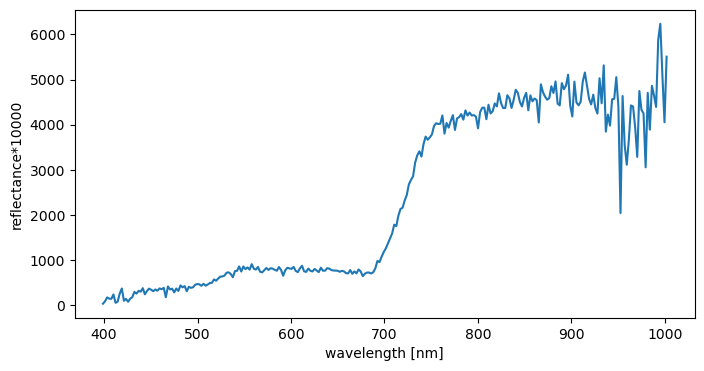

In [12]:
mp.figure(figsize=(8,4))
mp.xlabel("wavelength [nm]")
mp.ylabel("reflectance*10000")
mp.plot(wavelength, reflectance)

## Savitzky-Golay filter

Savitzky and Golay proposed a method of data smoothing based on local least-squares polynomial approximation. They showed that fitting a polynomial to a set of input samples and then evaluating the resulting polynomial at a single point within the approximation interval is equivalent to discrete convolution with a fixed impulse response. The lowpass filters obtained by this method reduce noise while maintaining the shape and height of waveform peaks. (Schafer, 2011).

In our case, the filter is applied to the reflectance values, and the parameters of the used polynomial order and window length can be adjusted.

In [15]:
filtered_data=sp.signal.savgol_filter(reflectance, window_length=10, polyorder=3, mode="nearest")

We are going to visualize both the raw spectral curve extracted from the hyperspectral image and the filtered spectral curve. 

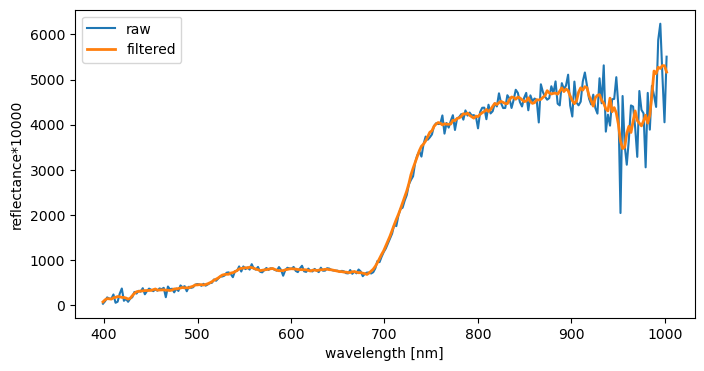

In [17]:
mp.figure(figsize=(8,4))
mp.xlabel("wavelength [nm]")
mp.ylabel("reflectance*10000")
mp.plot(wavelength, reflectance, label="raw")
mp.plot(wavelength, filtered_data, linewidth=2, label="filtered")
mp.legend()

Observe the effect of changing the polyorder.

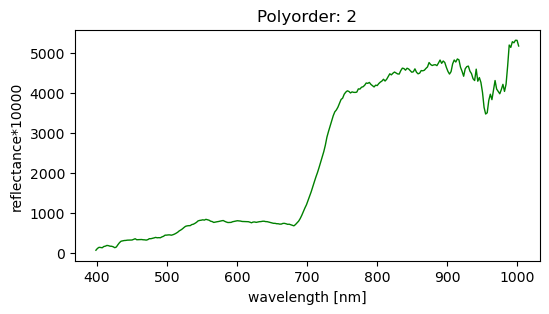

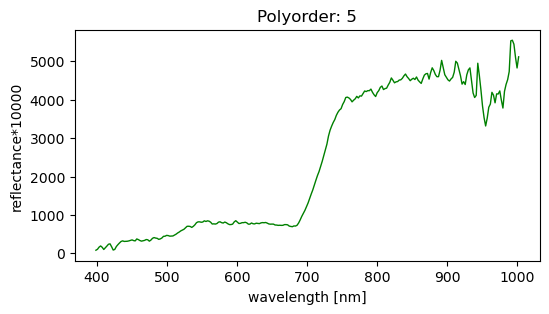

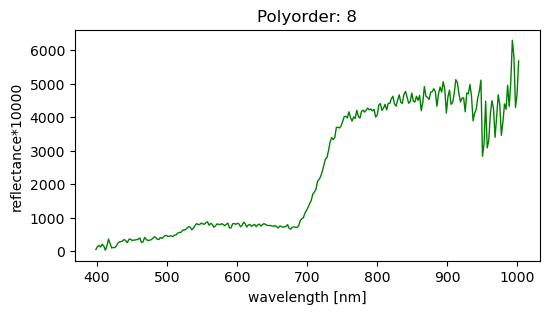

In [19]:
polyorder=[2,5,8]
for num in polyorder:
    mp.figure(figsize=(6,3))
    mp.xlabel("wavelength [nm]")
    mp.ylabel("reflectance*10000")
    filtered_data=sp.signal.savgol_filter(reflectance, window_length=10, polyorder=num, mode="nearest")
    mp.plot(wavelength, filtered_data, linewidth=1, color='green')
    mp.title("Polyorder: " + str(num))

Observe the effect of changing the window length.

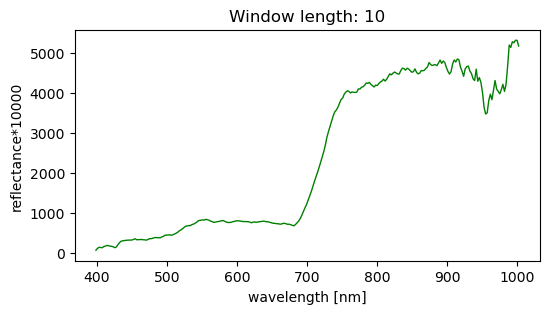

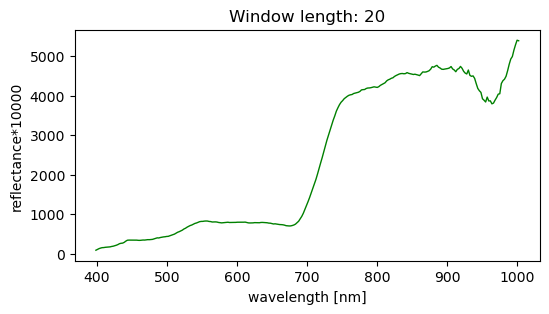

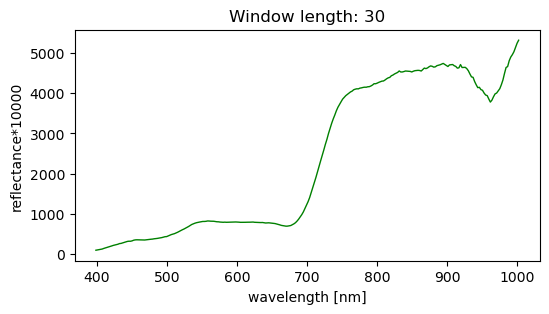

In [21]:
window_length=[10,20,30]
for num in window_length:
    mp.figure(figsize=(6,3))
    mp.xlabel("wavelength [nm]")
    mp.ylabel("reflectance*10000")
    filtered_data=sp.signal.savgol_filter(reflectance, window_length=num, polyorder=3, mode="nearest")
    mp.plot(wavelength, filtered_data, linewidth=1, color='green')
    mp.title("Window length: " + str(num))

## Simple Moving Average filter 

A moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different selections of the full data set. Variations include: simple, cumulative, or weighted forms. It is commonly used with [time series data](../../module1/01_principles_of_remote_sensing_time_series/01_principles_of_remote_sensing_time_series.html#time-series-filtering-and-noise-reduction) to smooth out short-term fluctuations and highlight longer-term trends or cycles. However, when used with non-time series data, a moving average filters higher frequency components without any specific connection to time, although typically some kind of ordering is implied. Mathematically, a moving average is a type of convolution and so it can be viewed as an example of a lowpass filter used in signal processing. (Wiki contributors, 2023) 

We are going to apply a simple moving average filter to the input reflectance values. The average is represented by the median, and the local window size is given by kernel_size. Elements of kernel_size should be odd.

In [24]:
filtered_data=sp.signal.medfilt(reflectance, kernel_size=3)

Both the raw spectral curve extracted from the hyperspectral image and the filtered spectra are visualized. 

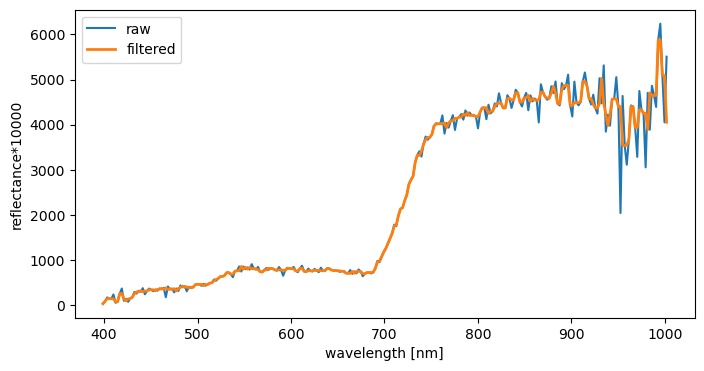

In [26]:
mp.figure(figsize=(8,4))
mp.xlabel("wavelength [nm]")
mp.ylabel("reflectance*10000")
mp.plot(wavelength, reflectance, label="raw")
mp.plot(wavelength, filtered_data, linewidth=2, label="filtered")
mp.legend()

Observe the effect of changing the window (kernel) size.

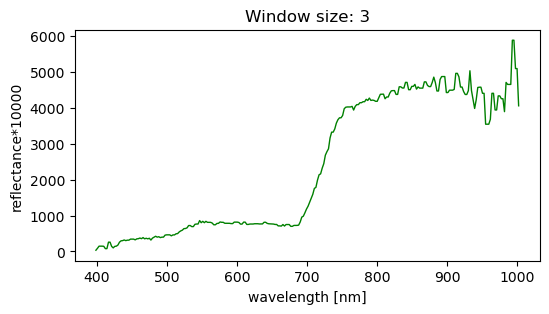

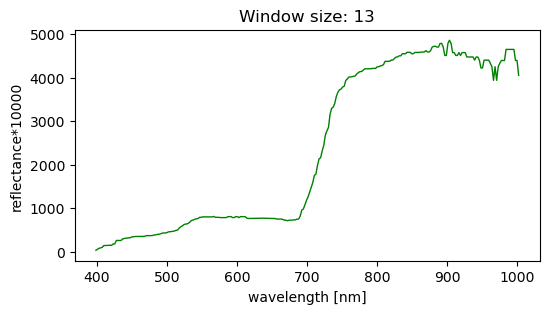

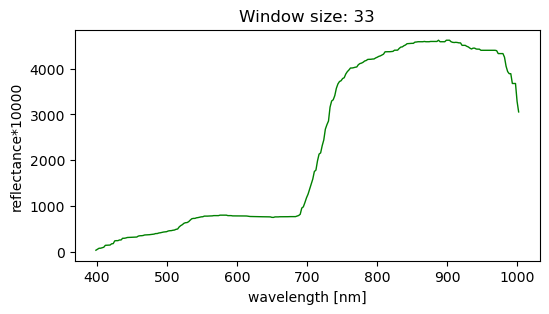

In [28]:
window_size=[3,13,33]
for num in window_size:
    mp.figure(figsize=(6,3))
    mp.xlabel("wavelength [nm]")
    mp.ylabel("reflectance*10000")
    filtered_data=sp.signal.medfilt(reflectance, kernel_size=num)
    mp.plot(wavelength, filtered_data, linewidth=1, color='green')
    mp.title("Window size: " + str(num))

## References

Schafer, R. (2011). “What Is a Savitzky-Golay Filter? [Lecture Notes].” IEEE Signal Processing Magazine 28, no. 4, 111–17. [10.1109/MSP.2011.941097](https://doi.org/10.1109/MSP.2011.941097).

Wikipedia contributors. (2023). Moving average. In Wikipedia, The Free Encyclopedia. [en.wikipedia.org/wiki/Moving_average](https://en.wikipedia.org/w/index.php?title=Moving_average&oldid=1180068319)

